In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [ ]:
def plot_hisotry(history):
  '''
  Takes history of our model and plot accuracy and loss function

  parms:
  history - model history

  output:
  -
  '''
  loss = history.history["loss"]
  acc = history.history["accuracy"]
  number_of_elements = len(loss)
  epochs = np.linspace(1,number_of_elements,number_of_elements)

  ## Plotting functions
  fig,ax = plt.subplots(2,1, figsize=(10,7))
  ax[0].plot(epochs, acc)
  ax[0].set_title("Accuracy")  
  ax[1].plot(epochs, loss)
  ax[1].set_title("Loss function")
  plt.show()


In [ ]:
def Predictions_DataFrame_format(model, train, label, if_predicted=False):
  '''
  Making predictions about label and showing it in DataFrame format, when if_predicted 
  is True it will show predicted labels

  parm:
    model - model that will predict the labels
    train - data we use to evaluate labels
    label - coresponding true labels for train data
    if_predicted - if set to True returns predicted labels

  output:
    df - DataFrame with predictions and true labels
    Nr    Label_right     Label_model
    labels_predict - list of predicted values
  '''

  predictions = model.predict(train)
  labels_predict = [list(predictions[i]).index(predictions[i].max()) for i in range(0, predictions.shape[0])]
  i = np.linspace(0, train.shape[0] - 1, train.shape[0], dtype="int")
  d = {"Data_number": i, "Label_right":label, "Label_model":labels_predict}
  df = pd.DataFrame(data=d)
  if if_predicted:
    return df, labels_predict
  return df

### Getting our data extracted

In [ ]:
## Getting our data
Wine_data = load_wine()
wine_data_img = Wine_data.data
wine_label = Wine_data.target


In [ ]:
## Shape of our input
wine_data_img.shape

(178, 13)

In [ ]:
## Target names
Wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
## Check target names
Wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
## Extracting the data to our model
(X, y) = load_wine(return_X_y=True)

## Creating a DataFrame to visualize labels we're using
import numpy as np
i = np.linspace(0, X.shape[0] - 1, X.shape[0], dtype="int")
d = {"Data nr": i, "Label": y}
df = pd.DataFrame(data=d)
df



,Data nr,Label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
173,173,2
174,174,2
175,175,2
176,176,2


In [ ]:
## Shuffle our data and use DataFrame to we it again
idx = np.random.permutation(X.shape[0])
data, labels = X[idx], y[idx]
d = {""}
d = {"Data nr": i, "Label": labels}
df = pd.DataFrame(data=d)
df

,Data nr,Label
0,0,1
1,1,0
2,2,2
3,3,2
4,4,1
...,...,...
173,173,1
174,174,2
175,175,0
176,176,0


### Prepering data:
- scaling,
- Separate into train and test data
- visualize,

In [ ]:
## Scale our data
data_scaled = data / data.max()
data_scaled

array([[7.42261905e-03, 9.04761905e-04, 1.30952381e-03, ...,
        6.90476190e-04, 1.56547619e-03, 5.57738095e-01],
       [7.64880952e-03, 9.52380952e-04, 1.50000000e-03, ...,
        6.48809524e-04, 2.16071429e-03, 6.04166667e-01],
       [7.63095238e-03, 2.00595238e-03, 1.36904762e-03, ...,
        4.28571429e-04, 1.04166667e-03, 4.07738095e-01],
       ...,
       [8.51190476e-03, 1.14285714e-03, 1.61904762e-03, ...,
        6.36904762e-04, 1.57738095e-03, 7.61904762e-01],
       [8.23214286e-03, 9.34523810e-04, 1.55952381e-03, ...,
        6.72619048e-04, 1.52976190e-03, 6.72619048e-01],
       [7.54166667e-03, 5.83333333e-04, 1.33333333e-03, ...,
        7.32142857e-04, 1.88095238e-03, 2.67857143e-01]])

In [ ]:
## Train data
train_data = data_scaled[:150,:]
train_labels = labels[:150]

## Test data
test_data = data_scaled[150:,:]
test_labels = labels[150:]

### Prepare first model, single Dense layer with 3 outputs

In [ ]:
## Setting the same seed 
tf.random.set_seed(42)

In [ ]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="softmax")
])

model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_0 = model_0.fit(train_data,train_labels,epochs=50,verbose=0)

In [ ]:
model_0.evaluate(test_data,test_labels)

1/1 [==============================] - 0s 90ms/step - loss: 1.0606 - accuracy: 0.6429


[1.060598611831665, 0.6428571343421936]

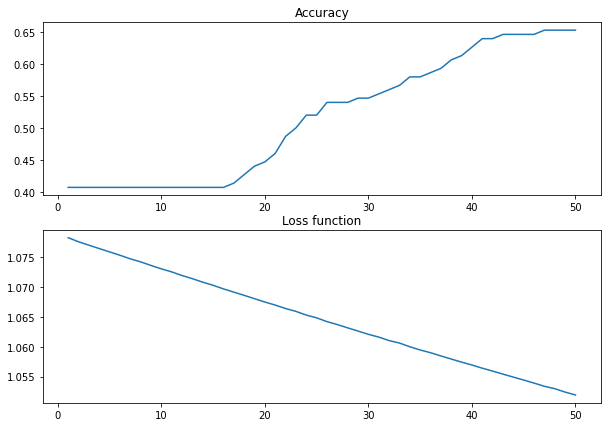

In [ ]:
plot_hisotry(history_0)

In [ ]:
## Seeing in DataFrame the results
data_df, predictions = Predictions_DataFrame_format(model_0, data_scaled,labels, if_predicted=True)
data_df[:7]

6/6 [==============================] - 0s 2ms/step


,Data_number,Label_right,Label_model
0,0,1,1
1,1,0,0
2,2,2,1
3,3,2,1
4,4,1,1
5,5,1,1
6,6,2,1


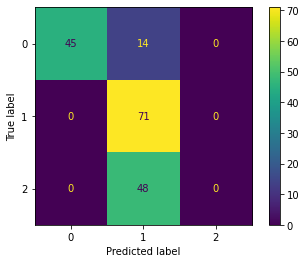

In [ ]:
## Using confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(labels, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Our model dont recognize label 2 and predict label 1 instead

In [ ]:
## Evaluate on the whole dataset
model_0.evaluate(data_scaled,labels)

6/6 [==============================] - 0s 3ms/step - loss: 1.0530 - accuracy: 0.6517


[1.0529789924621582, 0.6516854166984558]

## Cheking the labels in train and test data

In [ ]:
## Train data
i = np.linspace(0, len(train_labels) - 1, len(train_labels), dtype="int")
d = {"Data nr": i, "Label": train_labels}
df = pd.DataFrame(data=d)
df["Label"].value_counts()

1    61
0    50
2    39
Name: Label, dtype: int64

In [ ]:
## test data
i = np.linspace(0, len(test_labels) - 1, len(test_labels), dtype="int")
d = {"Data nr": i, "Label": test_labels}
df = pd.DataFrame(data=d)
df["Label"].value_counts()

1    10
0     9
2     9
Name: Label, dtype: int64

### Trying to upgrade our model:
- **Model 1** Add more epochs
- **Model 2** Add more hidden layers with number of epochs as Model 1
- **Model 3** Evaluate optimal learning rate 

### Model 1

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_1 = model_1.fit(train_data,train_labels,epochs=1000,verbose=0)


In [ ]:
model_1.evaluate(test_data,test_labels)

1/1 [==============================] - 0s 99ms/step - loss: 0.7852 - accuracy: 0.6786


[0.7852247953414917, 0.6785714030265808]

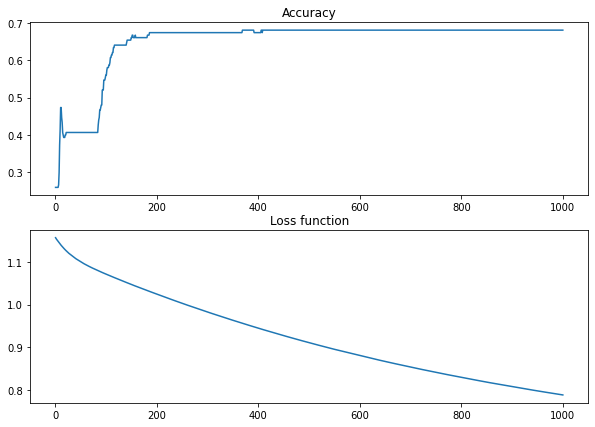

In [ ]:
plot_hisotry(history_1)

6/6 [==============================] - 0s 2ms/step


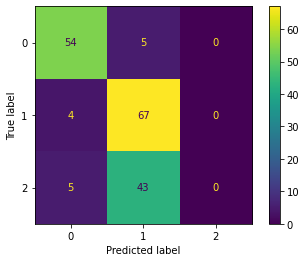

In [ ]:
## Using confusion matrix
data_df, predictions = Predictions_DataFrame_format(model_1, data_scaled,labels, if_predicted=True)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(labels, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

Model still dont recognize label 2

### Model 2

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2 = model_2.fit(train_data,train_labels,epochs=1000,verbose=0)

In [ ]:
model_2.evaluate(test_data,test_labels)

1/1 [==============================] - 0s 122ms/step - loss: 0.0479 - accuracy: 0.9643


[0.04785235598683357, 0.9642857313156128]

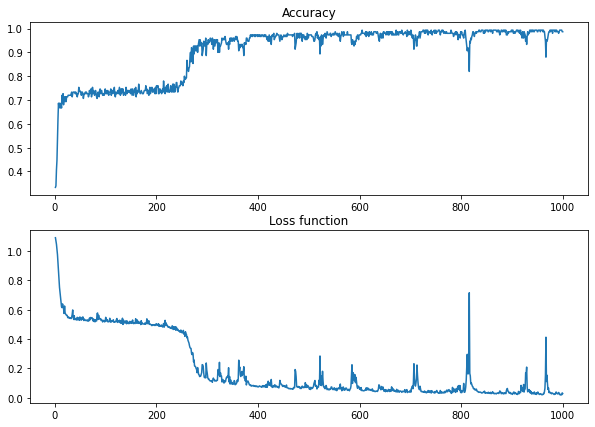

In [ ]:
plot_hisotry(history_2)

6/6 [==============================] - 0s 2ms/step


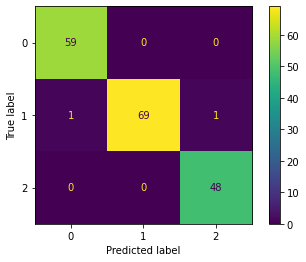

In [ ]:
## Using confusion matrix
data_df, predictions = Predictions_DataFrame_format(model_2, data_scaled,labels, if_predicted=True)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(labels, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

As we can see our model have accomplish accuracy of 96 % and recognized the label 2

### Model 3

In [ ]:
##Before fit we create callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/500))

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(train_data,train_labels,epochs=1000,verbose=0, callbacks=[lr_schedule])


Text(0, 0.5, 'Loss')

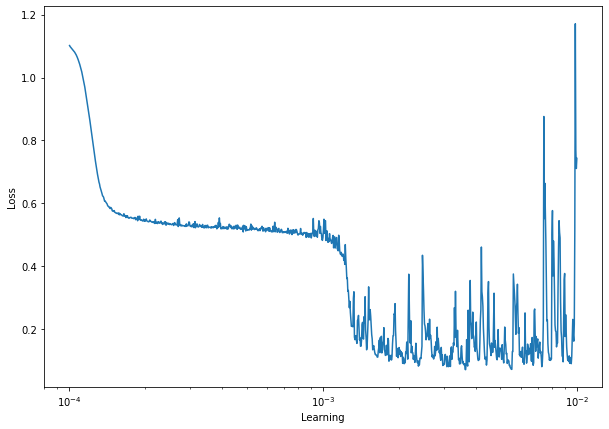

In [ ]:
lrs = [1e-4* 10**(epoch/500) for epoch in range(1,1001)]
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning")
plt.ylabel("Loss")

Our model with standard learning rate seems to be the best option

### Conclusion
Model 2 with few hidden layers, seems to be the best for our problem. The accuracy of model 2 is 96% and only classify 2 data wrongly